In [1]:
import sys
sys.path.append(str('/home/jupyter/'))
import pandas as pd
from configparser import ConfigParser
from repo.MyConfigParser import MyConfigParser
from repo.Optimization import SavantPSO
import numpy as np

In [2]:
# pip install pyswarms

# Read In

In [3]:
updated_config = ConfigParser()
config_in_path = "/home/jupyter/DE/Jun 2024/config ups de.ini"
updated_config.read(config_in_path)

getdict = MyConfigParser()
config_dict=getdict.GetDict(updated_config)
region = config_dict['CLIENTINFO']['country']
cutoff_month = config_dict['PROPHETSETTING']['cut_off_point']
base_start = config_dict['PROPHETSETTING']['reference_start_date1']
base_end = config_dict['PROPHETSETTING']['reference_end_date1']
periods = config_dict['PROPHETSETTING']['periods']
base_periods  = config_dict['PROPHETSETTING']['base_periods']

output_bucket = config_dict["FILEPATH"]["output_bucket"]
folder_name = config_dict["FILEPATH"]["folder_name"]

base_path = config_dict["FILEPATH"]["base_path"]

boundary_df_in_path = base_path + config_dict["FILEPATH"]["boundary_df_in_path"]
daily_df_out_path = base_path + config_dict["FILEPATH"]["daily_df_out_path"]
analytical_file_path = base_path + config_dict["FILEPATH"]["analytical_file_path"]
cuts_df_in_path = base_path + config_dict["FILEPATH"]["cuts_df_in_path"]
plot_name = base_path + config_dict["FILEPATH"]["plot_name"]
constraint_file_name = base_path + config_dict["FILEPATH"]["constraint_file_name"]
breakdown_ls = [config_dict['CLIENTINFO'][i] for i in [f'breakdown{i}' for i in range(1,5)] if config_dict['CLIENTINFO'][i] != None]

small_market_str = ''
pre_forecast_period_budget = float(config_dict['CLIENTINFO']['pre_forecast_period_budget'])
client_budget = float(config_dict['CLIENTINFO']['client_budget'])

save_date = config_dict['CLIENTINFO']['save_date']

In [4]:
# Get forecasters
bdDf = pd.read_csv(cuts_df_in_path)#.drop('Unnamed: 0', axis = 1)
cuts_df = bdDf.reset_index(drop = True)
cuts_df['forecaster_name_list'] =  cuts_df['market'] + ' ' + cuts_df['account_type'] + ' ' + cuts_df['funnel'] + '.pkl' #' 05.19.2021 Final.pkl'
cuts_df['periods'] = periods
# get model list
forecasters_array = cuts_df.forecaster_name_list

# Get analytical file
analytical_file = pd.read_csv(analytical_file_path).drop('Unnamed: 0', axis = 1)
analytical_file['ds'] = pd.to_datetime(analytical_file['ds'])
analytical_file_check_version = analytical_file.copy()

# Get constrain file
constraint_file = pd.read_csv(constraint_file_name)
constraint_file['init'] = constraint_file[['MinWeight', 'MaxWeight']].mean(axis = 1)

In [5]:
constraint_file

,market,account_type,funnel,Month,Year,variable_splits,Constrain_Variable_Name,periods_for_acc_cal,changepoint_prior_scale,seasonality_prior_scale,...,new_confirmed,power,growth,MAPE,period_AE,periods,cutoff_month,MinWeight,MaxWeight,init
0,Germany,Desktop,-,Apr,2024,Germany_Desktop_-_Apr_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
1,Germany,Desktop,-,May,2024,Germany_Desktop_-_May_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
2,Germany,Desktop,-,Jun,2024,Germany_Desktop_-_Jun_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
3,Germany,Desktop,-,Jul,2024,Germany_Desktop_-_Jul_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
4,Germany,Desktop,-,Aug,2024,Germany_Desktop_-_Aug_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
5,Germany,Desktop,-,Sep,2024,Germany_Desktop_-_Sep_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
6,Germany,Desktop,-,Oct,2024,Germany_Desktop_-_Oct_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
7,Germany,Desktop,-,Nov,2024,Germany_Desktop_-_Nov_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.7,0.8,0.75
8,Germany,Desktop,-,Dec,2024,Germany_Desktop_-_Dec_2024,cost,183,0.10,10,...,na,na,linear,11.55,5.09,251.0,2024-04-25,0.8,1.2,1.00
9,Germany,Mobile & Tablet,-,Apr,2024,Germany_Mobile_&_Tablet_-_Apr_2024,cost,183,0.05,10,...,na,na,logistic,21.78,22.26,251.0,2024-04-25,0.8,1.2,1.00


# Functions

In [6]:
resultPSO = SavantPSO(cuts_df, analytical_file, constraint_file, config_dict)

In [8]:
itNum = 150
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
# result = resultPSO.run_pso(options, itNum = itNum)

In [ ]:
# %load_ext autoreload
# %autoreload 2
result = resultPSO.run_pso(options, itNum = itNum)

2024-05-30 07:39:56,219 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


/home/jupyter/DE/Jun 2024/Input Weight History 05.30.2024.csv


pyswarms.single.global_best:   0%|          |0/150

[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000003
yhat: -222826.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000003
yhat: -222826.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next

pyswarms.single.global_best:   1%|          |1/150, best_cost=-2.23e+5

yhat: -222826.0
client_budget - analytical_spend_latest_period: 0
[1.17168258 1.17804858 0.87662105 0.90058459 1.19030399 1.1078593
 0.96723211 0.7169171  1.18559099 1.12378343 1.15422469 1.01311756
 0.94079145 1.17460652 0.94520797 0.96601392 0.72000221 0.87842468]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222980.0
client_budget - analytical_spend_latest_period: 0
[0.98754857 0.99958564 1.14503564 0.91157718 1.16792089 1.03797367
 1.04248348 0.7371273  0.83407557 0.83303884 0.9011984  1.10926885
 1.01776687 0.92747083 1.00667517 0.86235608 0.77652482 0.83989205]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:   1%|▏         |2/150, best_cost=-2.23e+5

yhat: -222458.0
client_budget - analytical_spend_latest_period: 0
[0.86899422 0.93013717 1.12316784 1.16243268 0.9037487  1.14958313
 0.83697896 0.7978343  0.88946129 1.17335991 0.88753491 0.9237772
 1.18839548 0.86758266 0.84755952 0.82976943 0.71719609 1.11985312]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222989.0
client_budget - analytical_spend_latest_period: 0
[0.92501459 0.9475332  0.81963681 1.13119789 0.91414152 1.0193484
 1.02778521 0.73545777 1.03790177 0.98427065 1.11178156 0.80441698
 1.03323775 0.8126229  0.96079608 1.03911649 0.79962186 1.04878307]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   2%|▏         |3/150, best_cost=-2.23e+5

yhat: -223115.0
client_budget - analytical_spend_latest_period: 0
[0.91081048 1.06421951 0.9377841  0.98679073 0.95395013 1.13276654
 1.02353889 0.7016709  0.92852308 1.16207143 1.00488979 1.13923493
 0.95218    0.89691574 1.1112215  1.00875702 0.75040321 0.92362775]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222833.0
client_budget - analytical_spend_latest_period: 0
[0.83263283 0.85144566 0.890921   0.83118886 1.04925146 0.95448228
 0.96553803 0.75615195 0.80093697 1.05585541 0.8245067  0.94812104
 1.04742834 1.08599571 0.87701893 1.12067452 0.71596807 1.18217344]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:   3%|▎         |4/150, best_cost=-2.23e+5

yhat: -222926.0
client_budget - analytical_spend_latest_period: 0
[0.89445503 1.17943932 1.13154195 0.81574204 0.94536546 1.07006502
 1.11381243 0.75921098 0.91368602 1.10206712 1.09355824 0.82867072
 1.06216519 0.86810536 0.94216293 1.10830389 0.72558893 1.1050321 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222834.0
client_budget - analytical_spend_latest_period: 0
[1.12329971 1.14780395 0.94229531 0.87379141 1.17508987 0.85892086
 0.87493261 0.70796709 0.95080432 1.02518865 0.87479479 1.10321952
 1.05126008 0.89364826 1.17014233 1.11193586 0.73744748 0.85361655]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:   3%|▎         |5/150, best_cost=-2.23e+5

yhat: -222996.0
client_budget - analytical_spend_latest_period: 0
[0.82580113 0.86128525 0.89959123 1.05465652 0.88243535 0.97369712
 1.1061735  0.76553906 0.84698162 1.00238584 1.1413792  0.86497489
 1.10738157 1.19538064 1.12930612 1.08683375 0.7520728  0.86139127]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222594.0
client_budget - analytical_spend_latest_period: 0
[0.9529631  0.99061401 0.95315399 0.86673036 0.88315676 1.15854184
 1.18327119 0.70408859 1.06059088 0.92694074 0.87901519 0.83324475
 1.04862412 1.07671805 0.99911086 1.01125184 0.75671524 0.91441501]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:   4%|▍         |6/150, best_cost=-2.23e+5

yhat: -222946.0
client_budget - analytical_spend_latest_period: 0
[1.12384386 0.94245215 1.07483899 0.87852569 1.18623992 0.85458946
 1.01546694 0.72102968 1.14311651 0.87435323 1.14397111 0.8524398
 1.09881287 1.02376363 0.83744121 0.96439587 0.7329536  1.00134586]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222880.0
client_budget - analytical_spend_latest_period: 0
[1.15717241 0.80443212 0.91273246 0.82241867 1.00305181 1.00695112
 1.02252248 0.75309229 1.12557511 1.17146338 0.83560183 0.97296839
 1.04045696 0.80570361 1.19837293 0.86665004 0.77671487 0.95687824]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:   5%|▍         |7/150, best_cost=-2.23e+5

yhat: -222683.0
client_budget - analytical_spend_latest_period: 0
[0.96453987 1.01320881 0.83567383 1.08945161 1.00151009 1.11380194
 0.87377251 0.74277891 0.9710425  1.14657061 1.14665696 1.19407225
 1.04934316 0.81807693 0.93389587 1.19055588 0.77646952 1.12567764]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222615.0
client_budget - analytical_spend_latest_period: 0
[0.92941298 1.01422011 0.83415617 1.15658878 1.12764824 0.82662986
 0.83396735 0.75550433 1.15935409 0.91937235 1.16362724 1.09369276
 1.03160648 0.93638248 0.95357865 1.08915741 0.79252915 0.98926414]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:   5%|▌         |8/150, best_cost=-2.23e+5

yhat: -222699.0
client_budget - analytical_spend_latest_period: 0
[1.16082252 1.07128064 0.98679884 0.88679955 1.17527795 0.94033208
 1.10278634 0.73140317 1.16635164 0.97604081 1.12611798 1.04461289
 0.96672608 0.99604002 1.01384032 0.92205377 0.78257403 0.8257944 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -223017.0
client_budget - analytical_spend_latest_period: 0
[1.08407579 1.19694192 1.12459044 1.02689394 0.84008122 1.0338284
 1.04498901 0.71784523 1.14561434 1.0405185  1.01855581 1.19699609
 1.02185473 1.05104415 1.09021024 0.85526399 0.70541438 0.98641275]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:   6%|▌         |9/150, best_cost=-2.23e+5

yhat: -222988.0
client_budget - analytical_spend_latest_period: 0
[0.93173418 1.12203126 1.11920221 1.06369998 0.92612823 1.13896399
 0.90212289 0.78333946 0.93286358 1.17557021 1.10841218 0.86057061
 0.84400418 1.15116826 1.08269052 1.03649869 0.76089762 0.91314195]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222900.0
client_budget - analytical_spend_latest_period: 0
[0.81237247 0.92690526 0.97628445 0.85408305 1.00194929 0.81532991
 0.82842125 0.74942451 1.11260138 1.13850231 0.83172054 0.86706276
 1.01290536 1.13957344 1.19111157 1.00080479 0.72018022 0.95317011]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:   7%|▋         |10/150, best_cost=-2.23e+5

yhat: -222852.0
client_budget - analytical_spend_latest_period: 0
[1.08957876 1.15593698 0.81898553 0.81413035 1.09592473 0.87246083
 1.08762407 0.79506441 1.09759677 0.93612676 1.09439085 1.06288547
 1.10194995 0.87348307 1.12782279 1.12920561 0.71696239 0.98685782]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000003
yhat: -222667.0
client_budget - analytical_spend_latest_period: 0
[0.95684492 1.04688978 0.82926054 1.05733599 1.16184674 1.01635208
 1.02512581 0.75149618 1.05208409 1.18993139 1.03601679 0.94976751
 1.00583864 1.17476441 0.84807928 1.12391881 0.74058167 0.92121531]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:   7%|▋         |11/150, best_cost=-2.23e+5

yhat: -223018.0
client_budget - analytical_spend_latest_period: 0
[0.83839688 1.17879903 0.92823583 0.96337982 0.84687151 1.00423519
 0.84995486 0.768423   0.84965735 1.07553281 1.08927113 0.8329796
 0.90262113 0.99913826 1.14358421 1.19114718 0.76074692 1.0291143 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222525.0
client_budget - analytical_spend_latest_period: 0
[1.08766718 1.14456108 1.10770464 0.81357047 0.90117116 1.19539379
 1.19986263 0.72647781 0.99583893 1.17636677 0.81719917 1.03654407
 1.00031942 1.19905559 0.90948436 0.82275439 0.75879972 0.88230368]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:   8%|▊         |12/150, best_cost=-2.23e+5

yhat: -222957.0
client_budget - analytical_spend_latest_period: 0
[1.00644498 1.19562011 1.03356236 1.08471962 1.00122844 1.11610713
 1.02307539 0.71536569 1.02931883 1.17163508 1.08558617 1.0114762
 1.09140131 1.10866598 1.13525715 0.84070354 0.78806269 1.05288812]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222863.0
client_budget - analytical_spend_latest_period: 0
[0.80165524 0.82814689 0.94863224 0.95495659 1.0239093  0.95050416
 0.95011858 0.78015117 0.94670681 1.15495485 0.98104213 1.10896469
 0.99533899 0.81780381 0.96453669 0.91122208 0.77450004 0.84733228]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:   9%|▊         |13/150, best_cost=-2.23e+5

yhat: -222899.0
client_budget - analytical_spend_latest_period: 0
[1.15774267 1.18893312 1.11906698 1.16313939 1.15408585 1.19598495
 1.18637698 0.74487365 1.19245645 0.83572777 1.08740539 1.16670448
 0.84035949 0.80029561 1.10059571 0.88609144 0.79774587 1.06440131]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -223233.0
client_budget - analytical_spend_latest_period: 0
[0.93056606 0.92629268 1.1893964  1.07124831 1.13113468 1.14154495
 1.1272766  0.70489501 0.90825154 1.13754279 1.09704837 1.15946504
 0.99153407 0.90981321 1.00344783 0.9800094  0.78590773 0.81709426]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:   9%|▉         |14/150, best_cost=-2.23e+5

yhat: -222895.0
client_budget - analytical_spend_latest_period: 0
[0.8885526  1.1814718  1.19324223 0.83148469 0.88722268 0.8653285
 0.92763853 0.75802209 0.93296419 0.89213817 1.08999655 0.89624908
 0.9718415  0.88077649 1.06762861 0.92615143 0.79119113 1.06746632]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222665.0
client_budget - analytical_spend_latest_period: 0
[1.0558721  1.04157553 0.99315194 1.16579614 1.1888191  0.91432186
 0.89163669 0.71486987 0.88663579 1.12456799 1.15679826 1.19236748
 0.98970949 1.03582738 1.02190594 1.01945276 0.79123203 1.19127053]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  10%|█         |15/150, best_cost=-2.23e+5

yhat: -222480.0
client_budget - analytical_spend_latest_period: 0
[1.01124513 1.17639367 0.85086478 0.90260086 1.0558678  0.96754189
 1.05728546 0.75584082 1.07915599 0.93946043 1.09262736 1.03543895
 1.08372335 0.94740572 1.03672139 0.95541855 0.77125543 1.06767017]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222748.0
client_budget - analytical_spend_latest_period: 0
[1.16732517 1.15199353 1.1932774  0.82617877 1.19487668 1.08890787
 1.04491746 0.71243438 0.88808836 1.10780514 1.15900061 1.19708825
 0.98942442 1.16094423 1.03249675 1.03560438 0.78767292 1.15233132]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  11%|█         |16/150, best_cost=-2.23e+5

yhat: -223018.0
client_budget - analytical_spend_latest_period: 0
[1.14869229 1.17118241 0.90614326 1.02078639 0.81267644 1.10320689
 1.19348821 0.73941469 0.81123593 0.96938566 1.09520056 1.15488502
 1.15032121 0.98639028 1.01260455 0.97909603 0.74458453 1.06649508]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222720.0
client_budget - analytical_spend_latest_period: 0
[0.85987391 0.84643428 0.94753773 0.88385403 1.18525329 0.85818642
 0.80373669 0.79920792 0.91035257 1.09785832 1.15077587 1.17685489
 0.99002103 0.86877866 1.03086275 1.00965758 0.77881055 1.0897555 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  11%|█▏        |17/150, best_cost=-2.23e+5

yhat: -222756.0
client_budget - analytical_spend_latest_period: 0
[0.86872207 1.1654079  0.98782127 1.14010588 0.95921588 0.82978447
 0.91062224 0.71243219 0.97689371 0.96878536 1.09807873 0.85809344
 1.19148495 0.99007985 1.0073888  0.99629074 0.71642907 1.06297234]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222711.0
client_budget - analytical_spend_latest_period: 0
[0.95012416 0.9560678  1.10098297 0.92866741 1.13767873 1.01728185
 0.95814264 0.77074842 0.9368936  1.10007784 1.11131463 1.1315772
 0.99068684 1.01388914 1.00838042 0.97951671 0.76882982 1.01357861]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  12%|█▏        |18/150, best_cost=-2.23e+5

yhat: -223040.0
client_budget - analytical_spend_latest_period: 0
[0.98922385 1.1604465  1.06355618 0.84602735 1.10912343 1.01434533
 1.04692139 0.78260639 1.15890861 0.95010449 1.10024394 1.00059913
 0.80028075 0.96174523 1.00689793 0.9897955  0.78861001 1.05665937]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222915.0
client_budget - analytical_spend_latest_period: 0
[1.05643195 1.08634578 0.83431333 0.96215922 1.05436805 1.17701288
 1.10558517 0.73251556 0.96794351 1.10139814 1.05021864 1.06962757
 0.9931407  1.15794563 0.97451894 0.94786901 0.75944049 0.93685836]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  13%|█▎        |19/150, best_cost=-2.23e+5

yhat: -222768.0
client_budget - analytical_spend_latest_period: 0
[1.10411044 1.1557644  1.13695867 0.94300557 0.8408103  1.1790397
 1.18222737 0.74336134 0.91726066 0.92913333 1.10238714 1.14881233
 0.81649936 0.9097445  1.02136251 0.97862394 0.75119169 1.05012078]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222928.0
client_budget - analytical_spend_latest_period: 0
[1.15219979 0.80320969 0.97931797 0.98147746 0.97080697 0.91869478
 0.8492037  0.78582238 0.99603834 1.10518339 0.98525877 1.01061841
 0.99636534 0.88681938 0.93544534 0.91325272 0.75033407 0.86746675]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  13%|█▎        |20/150, best_cost=-2.23e+5

yhat: -222880.0
client_budget - analytical_spend_latest_period: 0
[0.81170831 1.15290605 1.19586935 1.05876512 1.00916703 0.92354447
 0.89991453 0.79693477 1.06629555 0.9071973  1.10402523 0.87564272
 0.84025883 0.8499324  1.04451005 0.95406197 0.71370297 1.04249966]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222976.0
client_budget - analytical_spend_latest_period: 0
[0.82488358 0.93955026 1.1242737  0.98080337 0.88852875 1.10270409
 0.99340033 0.72315214 1.02032457 1.1176979  0.90472426 0.95743752
 0.99938756 1.0445614  0.90215447 0.87527989 0.74184431 0.80735144]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  14%|█▍        |21/150, best_cost=-2.23e+5

yhat: -222722.0
client_budget - analytical_spend_latest_period: 0
[0.94339253 1.15307115 0.84147483 1.17739462 1.18302349 1.06611424
 1.0107959  0.74186327 0.80065352 0.88253866 1.10323713 1.02960039
 0.86234341 1.18848366 1.06357563 0.92313708 0.78507832 1.03490887]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222857.0
client_budget - analytical_spend_latest_period: 0
[0.90579379 1.0721966  0.84662746 0.97514081 0.82673834 0.87055361
 1.13707192 0.75653343 1.03961327 1.13806099 0.82479093 0.91942551
 1.00195938 0.80398042 0.87540012 0.8404448  0.73696507 1.16804045]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  15%|█▍        |22/150, best_cost=-2.23e+5

yhat: -223036.0
client_budget - analytical_spend_latest_period: 0
[1.07024536 1.15912426 0.94040884 0.87902394 0.92984898 1.19116905
 1.11989285 0.78186678 0.94625402 0.85327824 1.1011618  1.18396828
 0.88190716 1.13029317 1.0793287  0.89356222 0.74896908 1.03144986]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222784.0
client_budget - analytical_spend_latest_period: 0
[0.98178633 1.19336972 1.00820569 0.94266127 1.19079385 1.06818493
 0.87010845 0.78310186 1.0548318  1.1524997  1.1654641  0.90510316
 1.00384458 0.99195933 0.855264   0.80863156 0.73363632 1.07418308]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  15%|█▌        |23/150, best_cost=-2.23e+5

yhat: -223093.0
client_budget - analytical_spend_latest_period: 0
[1.19756094 1.1687963  1.03476712 0.99689093 1.0633748  0.90024943
 0.82097154 0.71105064 1.1073154  0.8270683  1.0982022  0.91180191
 0.89572827 1.0200924  1.09240374 0.86725225 0.71235664 1.03220527]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222835.0
client_budget - analytical_spend_latest_period: 0
[1.06670239 0.89417394 1.15675176 0.90715083 1.12625163 0.85232418
 1.00314826 0.70461512 1.05832803 1.16366256 1.10288821 0.90712213
 1.00503907 1.17014163 0.84764764 1.18360883 0.73170681 0.96924221]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  16%|█▌        |24/150, best_cost=-2.23e+5

yhat: -222800.0
client_budget - analytical_spend_latest_period: 0
[0.90448162 1.17928315 1.12442043 1.12931032 1.19292432 1.04364336
 0.92694042 0.73741636 0.85385839 0.80616674 1.09631198 1.0276386
 0.90534063 0.89106554 1.10193891 0.84604721 0.78353654 1.02727661]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000003
yhat: -223015.0
client_budget - analytical_spend_latest_period: 0
[1.14362151 1.01711071 0.87401893 0.86439697 1.05882517 1.06025731
 1.15116493 0.72578972 1.05366129 1.17150952 1.02735605 0.92137473
 1.00600179 0.92652613 0.8508363  1.09560296 0.73436087 0.8578839 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  17%|█▋        |25/150, best_cost=-2.23e+5

yhat: -222832.0
client_budget - analytical_spend_latest_period: 0
[1.04986364 1.18762416 0.80073731 0.84637736 0.90281274 1.19936758
 1.03632346 0.76130914 1.0035791  1.19247169 1.091747   1.15267862
 0.90966477 1.16529314 1.1092544  0.83336883 0.74827395 1.02976248]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222699.0
client_budget - analytical_spend_latest_period: 0
[0.8081198  1.13034978 1.02307753 0.82463988 1.00109219 0.84658976
 0.88100876 0.74581911 1.048081   1.17473076 0.95304483 0.93749717
 1.00404056 1.10622226 0.8616058  0.97765144 0.73744282 1.16280881]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  17%|█▋        |26/150, best_cost=-2.23e+5

yhat: -222454.0
client_budget - analytical_spend_latest_period: 0
[1.18991825 1.19015988 0.88986626 0.98471997 1.0515695  0.93167629
 1.14487407 0.77956586 1.16972593 1.12032059 1.0861364  0.86202455
 0.9035401  1.04673929 1.11052742 0.82766983 0.71010567 1.03074247]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222989.0
client_budget - analytical_spend_latest_period: 0
[0.89635691 0.83071824 1.15645039 1.19208387 0.93942938 1.03205347
 1.05327135 0.76298918 1.03202872 1.1744628  0.86978157 0.95554973
 1.00096494 0.87081067 0.87798317 0.84889689 0.74303556 1.07327905]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  18%|█▊        |27/150, best_cost=-2.23e+5

yhat: -222926.0
client_budget - analytical_spend_latest_period: 0
[0.90714991 1.18920459 0.97611912 1.11544167 0.80398236 1.08890796
 0.83982874 0.79416291 0.91595213 1.05171401 1.08102668 0.97837411
 0.89477533 0.94042206 1.10590054 0.82679569 0.7767599  1.03112629]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222831.0
client_budget - analytical_spend_latest_period: 0
[0.99802101 0.93323493 0.86423822 1.10239632 0.88484377 0.8124008
 0.81122615 0.77128003 1.01330687 1.17339068 1.18963504 0.98494593
 0.99817008 1.03826355 0.89528761 1.13505975 0.74939722 0.95751394]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  19%|█▊        |28/150, best_cost=-2.23e+5

yhat: -222834.0
client_budget - analytical_spend_latest_period: 0
[1.01529912 1.17866283 1.06281195 0.83227932 0.97582064 0.83793322
 0.98723559 0.70562236 1.06937623 0.97431686 1.07542644 1.11413832
 0.88083919 0.829991   1.09855301 0.82867342 0.73895095 1.03450212]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222740.0
client_budget - analytical_spend_latest_period: 0
[1.09208278 1.06412051 1.01108662 0.96876917 0.84411864 1.04739045
 0.9996179  0.7776918  0.99278771 1.16791482 1.04606131 1.01204835
 0.9929664  1.19434779 0.9117001  0.98448964 0.75649602 0.85477542]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  19%|█▉        |29/150, best_cost=-2.23e+5

yhat: -222556.0
client_budget - analytical_spend_latest_period: 0
[1.11523454 1.15968098 1.14275712 0.94166493 1.13441299 1.02706815
 1.12367499 0.72377833 0.81438077 0.90834642 1.07154689 0.84009981
 0.86558476 1.13346062 1.08794268 0.83694194 0.79892602 1.03761723]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222958.0
client_budget - analytical_spend_latest_period: 0
[1.17414212 1.18853878 1.14542429 0.8380874  0.82007954 0.85367035
 1.16615658 0.78287896 0.97482648 1.16273188 0.90489252 1.03570607
 0.98715365 0.92452099 0.92361199 0.83567459 0.76282662 1.17040764]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  20%|██        |30/150, best_cost=-2.23e+5

yhat: -222992.0
client_budget - analytical_spend_latest_period: 0
[0.80859493 1.14249995 0.80877097 1.05739556 0.87657411 0.82105628
 0.85196679 0.74193984 1.01505748 0.8438221  1.06778943 0.99790347
 0.84802736 0.97885293 1.07764152 0.84736131 0.75095634 1.04082426]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222632.0
client_budget - analytical_spend_latest_period: 0
[0.83863271 0.88199592 0.85925814 1.1295604  0.82557247 1.10138668
 0.91739971 0.7815844  0.96051624 1.15781464 1.18259017 1.05361727
 0.98296291 1.04283225 0.93093249 1.1045758  0.76763905 1.06727964]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  21%|██        |31/150, best_cost=-2.23e+5

yhat: -222968.0
client_budget - analytical_spend_latest_period: 0
[0.9048231  1.13134819 0.87381415 1.16070892 1.02317276 1.02588706
 0.9702454  0.75874361 0.815808   1.18951077 1.06506914 1.14627574
 0.83324127 0.82437508 1.07165307 0.86316748 0.70621696 1.0446772 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222892.0
client_budget - analytical_spend_latest_period: 0
[0.92543698 0.98442658 0.990131   1.00117452 0.84421884 0.92923416
 1.06491445 0.77213091 0.9484624  1.14983556 1.03611113 1.06339274
 0.97881829 1.17178638 0.93221249 0.96572806 0.77130443 0.96513391]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  21%|██▏       |32/150, best_cost=-2.23e+5

yhat: -222592.0
client_budget - analytical_spend_latest_period: 0
[1.00037595 1.11968585 0.95837143 0.8506042  1.17760006 0.81223798
 1.10198958 0.77142368 1.02451156 1.11544342 1.06633123 0.87015658
 0.82293514 1.08718578 1.06849112 0.87878449 0.76479774 1.04626118]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222816.0
client_budget - analytical_spend_latest_period: 0
[1.03048273 1.10485239 1.12902476 0.88168226 0.87807131 1.15376981
 0.8047172  0.76327142 0.93896574 1.14130357 0.9069415  1.06427071
 0.97526294 0.88138009 0.9303441  0.8316519  0.77452663 0.87468277]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  22%|██▏       |33/150, best_cost=-2.23e+5

yhat: -223094.0
client_budget - analytical_spend_latest_period: 0
[1.10319201 1.11083231 1.05648261 0.95028071 0.90979472 1.03816344
 0.83270613 0.78226832 0.83315559 1.02208033 1.07033305 1.0294166
 0.81716621 0.95137922 1.06654455 0.89232498 0.71795888 1.04896234]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222745.0
client_budget - analytical_spend_latest_period: 0
[1.12898216 0.81594852 0.8470339  1.17785683 0.9160074  0.95706387
 0.94344799 0.74826671 0.94178183 1.13332407 1.1830896  1.06414292
 0.97221675 1.04158207 0.92379966 1.11417684 0.77501    1.19815111]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  23%|██▎       |34/150, best_cost=-2.23e+5

yhat: -222952.0
client_budget - analytical_spend_latest_period: 0
[1.19327228 1.10382477 1.14310689 1.07092975 1.04784984 0.86495816
 0.9601098  0.78999413 1.03299595 0.93425397 1.07633752 1.19280055
 0.81518557 0.80266632 1.0629984  0.90316713 0.77940126 1.05120905]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222899.0
client_budget - analytical_spend_latest_period: 0
[0.80873559 0.97732904 0.98779949 1.07823387 0.95263312 1.13788045
 1.10215339 0.7325345  0.95394378 1.12545843 1.05146794 1.05527821
 0.97077978 0.80947066 0.91227412 0.98657043 0.77389166 1.06504592]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  23%|██▎       |35/150, best_cost=-2.23e+5

yhat: -222843.0
client_budget - analytical_spend_latest_period: 0
[0.86922833 1.09407307 0.8151503  1.18054528 1.18653392 1.1137974
 1.08198566 0.78868838 0.83506309 0.85835404 1.08254634 0.93330022
 0.81391638 1.07366264 1.06204568 0.91046247 0.73408486 1.05072606]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -223007.0
client_budget - analytical_spend_latest_period: 0
[0.90381999 1.14393144 1.12500345 0.94741345 0.98729199 0.89702368
 0.84595362 0.71916094 0.96873049 1.12408249 0.92567986 1.04056599
 0.97209926 0.99580792 0.89937363 0.85282807 0.77094145 0.94609976]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  24%|██▍       |36/150, best_cost=-2.23e+5

yhat: -222931.0
client_budget - analytical_spend_latest_period: 0
[0.94254873 1.08280835 0.89029966 0.87272532 0.90592289 0.93799111
 0.80813466 0.78467824 1.05692716 1.19357943 1.08712718 1.06613644
 0.8146986  0.91358728 1.05918621 0.91147355 0.78341966 1.05103862]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222583.0
client_budget - analytical_spend_latest_period: 0
[1.02087488 0.88422219 0.84409086 0.82858387 1.00567309 1.04200197
 1.01248442 0.70986743 0.98526123 1.12460718 0.80792616 1.02200821
 0.97268802 1.17825023 0.88806577 1.13350128 0.76741558 0.83330474]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  25%|██▍       |37/150, best_cost=-2.23e+5

yhat: -222895.0
client_budget - analytical_spend_latest_period: 0
[1.05137565 1.09115095 0.96956403 1.01252347 1.05868639 1.15293492
 0.96050942 0.77905001 0.86041649 1.08556449 1.09017725 1.18230973
 0.81938171 1.15825509 1.05799267 0.90962141 0.7284054  1.05082819]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222783.0
client_budget - analytical_spend_latest_period: 0
[1.13070337 1.04258106 0.98846916 1.13288758 1.01989661 1.19086644
 1.16637825 0.70604002 1.00059697 1.1324569  1.10740279 1.00528671
 0.97579397 0.9370741  0.87863701 0.97615723 0.76346078 1.14379686]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  25%|██▌       |38/150, best_cost=-2.23e+5

yhat: -222905.0
client_budget - analytical_spend_latest_period: 0
[1.15815326 1.11257063 1.05192663 1.15973193 0.80677905 0.94704646
 1.13033815 0.77383066 1.08775066 0.97312006 1.0916497  0.87804861
 0.82751793 0.96531847 1.05552664 0.90738853 0.77061148 1.04908142]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222987.0
client_budget - analytical_spend_latest_period: 0
[0.81736386 1.18860257 1.13374708 1.04418485 1.02881435 0.91888361
 0.90202793 0.70487198 1.01238528 1.13591484 0.98644881 0.99213012
 0.98034184 1.07667037 0.87501554 0.81561693 0.7601356  1.0216299 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  26%|██▌       |39/150, best_cost=-2.23e+5

yhat: -223085.0
client_budget - analytical_spend_latest_period: 0
[0.84976338 1.13435107 1.12519036 0.88739945 1.00108531 1.12209656
 0.87950449 0.76625308 0.88445887 0.85505543 1.09224762 1.00050199
 0.83765631 1.18971046 1.05704654 0.90112723 0.70811841 1.04532824]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222749.0
client_budget - analytical_spend_latest_period: 0
[0.91625393 0.90463234 0.85660865 0.9612633  1.02107297 1.07222864
 1.0332822  0.70818988 1.02145768 1.1388962  0.84869183 0.97765662
 0.98606048 0.8161222  0.87134517 1.07686983 0.75756503 0.89006656]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  27%|██▋       |40/150, best_cost=-2.23e+5

yhat: -222829.0
client_budget - analytical_spend_latest_period: 0
[0.95917326 1.15026627 1.18785017 1.01907456 1.18970252 0.87617995
 1.0221802  0.75859847 1.09366707 1.15451343 1.09048853 1.1062979
 0.84703585 0.99286545 1.05997948 0.8935323  0.75294768 1.0412166 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222927.0
client_budget - analytical_spend_latest_period: 0
[1.02821854 1.02664092 1.00747855 0.87014304 1.01144252 0.8275776
 1.16029453 0.71337936 1.0255146  1.14506654 1.13075965 0.97177071
 0.99146956 0.98769852 0.87043241 0.93642737 0.75607258 1.17646807]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  27%|██▋       |41/150, best_cost=-2.23e+5

yhat: -222675.0
client_budget - analytical_spend_latest_period: 0
[1.06469853 1.16328408 0.82972895 1.15428945 0.95021043 1.0299557
 1.15237682 0.75122323 0.87576361 1.03940117 1.08649801 1.19909346
 0.85535127 1.19216902 1.05869322 0.88612852 0.79777931 1.03550805]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222782.0
client_budget - analytical_spend_latest_period: 0
[1.14028969 1.14828342 1.15756221 1.1851474  0.99129098 1.01037603
 0.87176455 0.7202687  1.02514367 1.15108835 1.02484116 0.96521541
 0.99631882 1.14744443 0.8752506  1.19656833 0.75576528 1.02434835]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  28%|██▊       |42/150, best_cost=-2.23e+5

yhat: -223040.0
client_budget - analytical_spend_latest_period: 0
[1.16744874 1.17169034 0.92877309 0.87291279 1.12307542 1.18010076
 0.87169782 0.74391496 1.06045343 0.90764557 1.08276794 0.87420403
 0.86157287 0.99291873 1.06139311 0.87915937 0.73638035 1.03412973]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222967.0
client_budget - analytical_spend_latest_period: 0
[0.83418936 0.85249601 0.88429954 1.06534458 0.96397404 1.17636716
 1.00720877 0.72835533 1.02398181 1.15958287 0.8961714  0.96608251
 0.99856435 0.89380736 0.88483577 1.03290977 0.75597772 0.88420938]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  29%|██▊       |43/150, best_cost=-2.23e+5

yhat: -222906.0
client_budget - analytical_spend_latest_period: 0
[0.85443273 1.1789992  1.02483608 1.00638448 0.87872529 0.91191396
 0.99260756 0.73845415 0.82617875 1.18036948 1.07949701 0.96851796
 0.86483659 0.80614943 1.06698894 0.87386647 0.77036729 1.03551628]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222792.0
client_budget - analytical_spend_latest_period: 0
[0.95189522 0.97824266 1.00395334 0.92816242 0.93569132 0.91892154
 1.15395906 0.735843   1.02097668 1.1660618  1.17392928 0.96269243
 1.0005581  1.03489553 0.89445256 0.88520434 0.75708172 1.16262184]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  29%|██▉       |44/150, best_cost=-2.23e+5

yhat: -222617.0
client_budget - analytical_spend_latest_period: 0
[0.98341142 1.18450212 1.12138074 1.14179282 1.05508795 1.04295832
 1.124682   0.73494809 0.97832108 1.04225536 1.07690872 1.07603182
 0.86602705 1.04617412 1.06781677 0.87125824 0.70005935 1.04024784]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -223029.0
client_budget - analytical_spend_latest_period: 0
[1.05980181 1.114179   1.12572355 1.18846374 0.90756507 1.09084965
 0.88486683 0.74117425 1.01555422 1.17050278 1.00384438 0.96051719
 1.00030128 1.16824432 0.90231915 1.15320397 0.75855295 1.03936495]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  30%|███       |45/150, best_cost=-2.23e+5

yhat: -222998.0
client_budget - analytical_spend_latest_period: 0
[1.09965487 1.18612277 0.80408427 0.86242299 0.81134894 1.17549824
 0.84968797 0.73252915 1.12147121 0.90602872 1.07473727 1.16984433
 0.86669223 0.85673606 1.06380348 0.87018964 0.74005036 1.04606379]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222725.0
client_budget - analytical_spend_latest_period: 0
[1.15881026 0.83083877 0.82875274 1.02604585 0.89154836 0.84941841
 1.05615872 0.74306004 1.00686349 1.17406857 0.855462   0.97318025
 0.99998137 0.87966624 0.90805279 0.9819159  0.76003323 0.90767557]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  31%|███       |46/150, best_cost=-2.23e+5

yhat: -223101.0
client_budget - analytical_spend_latest_period: 0
[0.80364854 1.18319808 0.94184231 1.03285704 0.95156292 0.88932633
 0.98284929 0.73253403 0.8523254  1.17734652 1.07326258 0.84238895
 0.86721953 1.08852336 1.06597109 0.87235102 0.78642638 1.0500067 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222713.0
client_budget - analytical_spend_latest_period: 0
[0.83622959 0.97058437 0.95360228 0.86872929 0.88480851 0.98888246
 0.83257578 0.74159998 0.99778653 1.17656264 1.12520099 0.98664604
 0.99699042 0.99668076 0.9121374  0.80223373 0.76151976 1.18837524]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  31%|███▏      |47/150, best_cost=-2.23e+5

yhat: -222551.0
client_budget - analytical_spend_latest_period: 0
[0.96339112 1.1752086  1.08360976 1.19859958 1.11622643 1.04958507
 1.11149215 0.73369145 1.02799388 1.06302056 1.07212098 0.94336723
 0.86369594 0.89799214 1.07002011 0.87554458 0.72682061 1.05295353]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -223147.0
client_budget - analytical_spend_latest_period: 0
[0.91801829 1.1198547  1.07250301 1.12991795 0.87952562 1.1478167
 1.00524381 0.74034565 0.98932019 1.17449171 0.98348147 0.99684857
 0.9942928  1.12810114 0.91378991 1.04995577 0.76267481 1.04398853]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  32%|███▏      |48/150, best_cost=-2.23e+5

yhat: -222951.0
client_budget - analytical_spend_latest_period: 0
[1.14237226 1.16499811 0.80899524 0.94075303 0.86709887 1.19835035
 0.83154959 0.7370127  0.810329   0.94434329 1.07268157 1.03807912
 0.8585476  1.1263917  1.07141016 0.87940638 0.76825581 1.05587456]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000005
yhat: -222624.0
client_budget - analytical_spend_latest_period: 0
[1.00056387 0.84813317 1.17767275 0.94967524 0.88119916 0.88950305
 1.16044811 0.73827141 0.98292858 1.16789638 0.83084918 1.00107809
 0.98989117 0.83971174 0.91268782 0.89603816 0.76341017 0.91384786]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  33%|███▎      |49/150, best_cost=-2.23e+5

yhat: -222967.0
client_budget - analytical_spend_latest_period: 0
[0.89877869 1.15684539 0.96156462 1.10564784 1.03138981 0.92692185
 0.95459611 0.7412825  0.97183222 0.8303939  1.07508776 1.13380183
 0.85131648 0.91930646 1.07340171 0.88370033 0.70505973 1.05609433]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222843.0
client_budget - analytical_spend_latest_period: 0
[1.08120834 0.96473335 0.8583638  1.18348409 0.89428754 1.04954864
 0.90284906 0.7343052  0.97911918 1.15952393 1.10088868 1.00536658
 0.98581163 0.99753086 0.90969972 1.15114497 0.76360054 0.80105769]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  33%|███▎      |50/150, best_cost=-2.23e+5

yhat: -222611.0
client_budget - analytical_spend_latest_period: 0
[1.08848064 1.14743006 1.1020015  0.86041419 1.18590473 1.0794498
 1.07304677 0.74553108 1.14763637 1.1366145  1.07621722 0.81315486
 0.84488781 1.12123513 1.07491365 0.88703372 0.75405605 1.05598433]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -223004.0
client_budget - analytical_spend_latest_period: 0
[1.15240982 1.06737134 0.97830317 1.02839091 0.9113084  0.81795273
 1.02840711 0.73046513 0.9767139  1.150506   0.98351232 1.01124012
 0.98175744 1.13834399 0.9068097  0.99563076 0.76319977 1.11482277]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  34%|███▍      |51/150, best_cost=-2.23e+5

yhat: -223011.0
client_budget - analytical_spend_latest_period: 0
[0.86620885 1.14064159 0.82758114 1.03119222 0.91586009 0.8283068
 1.18290094 0.74959435 0.90348604 1.02306296 1.07709085 0.94339005
 0.84002194 0.93750377 1.076584   0.88969141 0.79943757 1.05470204]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222766.0
client_budget - analytical_spend_latest_period: 0
[0.80184763 1.15248608 1.09278292 0.8790361  0.93005812 1.00837814
 1.13942639 0.72720986 0.97521806 1.14142226 0.87267023 1.01609855
 0.9795798  0.85545499 0.90245356 0.83087248 0.76291309 1.01691307]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  35%|███▍      |52/150, best_cost=-2.23e+5

yhat: -222947.0
client_budget - analytical_spend_latest_period: 0
[1.053802   1.13515601 0.95829102 1.18808219 1.05779726 0.99743169
 0.8787044  0.75369471 1.06135087 0.91321702 1.07747883 1.09311224
 0.83637422 1.15440463 1.07899254 0.89073283 0.73836334 1.05111301]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222842.0
client_budget - analytical_spend_latest_period: 0
[0.8752578  0.82355507 1.19415312 1.1516052  0.94805873 1.18302712
 0.84635392 0.7249546  0.97401841 1.13573315 1.17486294 1.01874169
 0.98050388 1.02083861 0.89805452 1.08692355 0.76216488 0.91781551]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  35%|███▌      |53/150, best_cost=-2.23e+5

yhat: -222973.0
client_budget - analytical_spend_latest_period: 0
[0.82413956 1.1362945  1.09711086 0.92054581 1.18718799 1.16648043
 1.02049935 0.75606998 0.8240192  0.81539003 1.07867629 0.81871476
 0.83562096 0.9315392  1.07695137 0.89065241 0.77286467 1.04565839]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -223047.0
client_budget - analytical_spend_latest_period: 0
[0.98341007 0.91071806 0.87623027 1.00867929 0.96782107 0.93473844
 1.00995302 0.72314622 0.97667479 1.13667354 1.06251154 1.0233202
 0.97998337 1.17838285 0.89308152 0.95542318 0.76177173 0.82534302]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  36%|███▌      |54/150, best_cost=-2.23e+5

yhat: -222836.0
client_budget - analytical_spend_latest_period: 0
[1.02555019 1.13655445 0.82171206 1.0760022  0.89502651 0.91823035
 1.18096482 0.7570148  1.02115391 1.1381824  1.07931827 0.95724696
 0.83579615 1.11721343 1.07517463 0.89006261 0.70565185 1.03764098]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222826.0
client_budget - analytical_spend_latest_period: 0
[1.09580203 0.99755148 0.99022209 0.85822187 0.98187363 1.10797486
 1.18391759 0.72278271 0.98047652 1.14106514 0.94947818 1.02167496
 0.97790512 0.9167206  0.88886478 0.82518303 0.76136556 1.15615099]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  37%|███▋      |55/150, best_cost=-2.23e+5

yhat: -222789.0
client_budget - analytical_spend_latest_period: 0
[0.80563406 1.14472962 0.95025437 0.82229956 1.03732828 1.10905617
 0.9213903  0.7555076  0.81407411 1.05920672 1.07934405 1.10497775
 0.83822027 0.88310855 1.07394822 0.88902826 0.75172156 1.03145914]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222733.0
client_budget - analytical_spend_latest_period: 0
[1.19308734 1.08279016 1.10042432 1.12434104 1.000129   0.85952704
 0.93656015 0.72313342 0.98515839 1.14978196 0.85002272 1.02063013
 0.97958088 1.08742917 0.88444964 1.11276515 0.7610154  1.07042201]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  37%|███▋      |56/150, best_cost=-2.23e+5

yhat: -223027.0
client_budget - analytical_spend_latest_period: 0
[0.97631106 1.1558395  1.07812504 0.99219237 1.18804649 0.89230002
 1.0775223  0.75369717 1.02687116 0.98986906 1.07911315 0.83198761
 0.8412234  1.06491069 1.06887232 0.8876477  0.70090191 1.03137309]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222994.0
client_budget - analytical_spend_latest_period: 0
[0.87098293 1.15169207 1.1963071  1.00328798 1.00439445 1.0157392
 1.09700893 0.72396976 0.98997479 1.15971412 1.15954696 1.01445735
 0.98317776 0.8482925  0.87979421 1.01179447 0.76076429 0.9596285 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  38%|███▊      |57/150, best_cost=-2.23e+5

yhat: -222539.0
client_budget - analytical_spend_latest_period: 0
[1.14778725 1.16282584 1.19790165 1.14891275 0.91862998 1.11614212
 0.82314677 0.75128588 0.82268685 0.89932104 1.07874004 0.96391066
 0.84413421 0.8277157  1.06156198 0.88616304 0.75915102 1.03458965]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -223005.0
client_budget - analytical_spend_latest_period: 0
[0.96724714 0.80563421 0.87426253 0.88300195 1.00545879 1.16516709
 0.8495171  0.72579442 0.99457355 1.16563064 1.05049392 1.00639449
 0.98654691 1.04322565 0.87798418 0.89938326 0.7611124  0.85953906]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  39%|███▊      |58/150, best_cost=-2.23e+5

yhat: -222868.0
client_budget - analytical_spend_latest_period: 0
[0.89737463 1.16172117 0.8894011  0.88717439 1.07303708 0.9259535
 0.9753307  0.74899516 1.01396416 0.81388757 1.07763667 1.0857263
 0.84728029 1.01999242 1.05545279 0.88427535 0.71691027 1.03881233]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222747.0
client_budget - analytical_spend_latest_period: 0
[1.0534686  0.87660509 0.97433684 1.17208012 1.00086536 0.89884614
 0.99627867 0.72895199 0.99826953 1.16953257 0.92557814 0.99629885
 0.98720616 0.8400079  0.8801638  1.19184639 0.76146895 1.17806244]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  39%|███▉      |59/150, best_cost=-2.23e+5

yhat: -222676.0
client_budget - analytical_spend_latest_period: 0
[1.05597238 1.16571753 1.00745289 1.0292809  0.81180021 1.15626999
 1.14586957 0.74686346 0.80573096 1.14480915 1.07747113 1.19048854
 0.85125374 0.83369986 1.05307399 0.88252888 0.78316394 1.04058938]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000003
yhat: -222899.0
client_budget - analytical_spend_latest_period: 0
[1.13183896 0.98831368 1.06486658 1.04405084 0.98707638 1.06213389
 1.16074426 0.73285969 1.00113613 1.17057993 1.19616059 0.98886313
 0.98765417 1.06470739 0.88250432 1.05184696 0.76233201 1.0762519 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  40%|████      |60/150, best_cost=-2.23e+5

yhat: -222803.0
client_budget - analytical_spend_latest_period: 0
[0.80065009 1.16620209 1.13304265 1.16097884 0.97727953 0.95816873
 0.89573    0.74571031 1.04559041 1.05690929 1.07736693 0.86733754
 0.85293124 1.06909008 1.04704661 0.88068309 0.74139839 1.0442918 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222931.0
client_budget - analytical_spend_latest_period: 0
[1.19379225 1.09772167 1.15210215 0.89100555 0.97010816 0.81883684
 0.91020572 0.7358274  1.00299626 1.16988908 1.01197947 0.9863754
 0.98828321 0.86458835 0.88389286 0.88669946 0.7631746  0.97526511]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  41%|████      |61/150, best_cost=-2.23e+5

yhat: -222848.0
client_budget - analytical_spend_latest_period: 0
[0.95676115 1.16271291 0.83989331 0.87520306 1.14776181 1.16233158
 1.03748422 0.74503692 0.85382075 0.97723884 1.07807813 0.94894112
 0.85367622 0.87556084 1.0362036  0.87965967 0.70085524 1.04675456]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222967.0
client_budget - analytical_spend_latest_period: 0
[0.84319224 1.19081956 0.82099989 1.15550143 0.9516071  1.0173129
 1.09729426 0.73794688 1.0028381  1.16746767 0.84466965 0.98307696
 0.98987847 1.0550822  0.88459538 1.13914294 0.76386927 0.88028653]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  41%|████▏     |62/150, best_cost=-2.23e+5

yhat: -222907.0
client_budget - analytical_spend_latest_period: 0
[1.12527877 1.15635077 0.94500117 0.99409015 0.8986419  0.9431661
 1.18492578 0.74538473 1.08218879 0.9076208  1.07958736 1.05821993
 0.85301811 1.09781606 1.03466021 0.87914067 0.76392901 1.04868545]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222838.0
client_budget - analytical_spend_latest_period: 0
[0.90542096 0.85854618 0.91701578 0.99481527 0.9388681  0.81668281
 0.86460718 0.73968418 1.00195188 1.16454513 1.09955651 0.98259168
 0.99015854 0.84659184 0.88835625 0.97269715 0.7640999  1.19824569]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  42%|████▏     |63/150, best_cost=-2.23e+5

yhat: -222358.0
client_budget - analytical_spend_latest_period: 0
[0.87402363 1.14918524 1.04063222 1.12592426 1.05966771 1.11537562
 0.9131423  0.74610665 0.88338497 0.84483787 1.08090903 1.16750089
 0.85138764 0.89490572 1.03429273 0.87977556 0.72104129 1.05041251]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222955.0
client_budget - analytical_spend_latest_period: 0
[0.99503118 0.95154068 1.02890836 0.83360785 0.93244373 1.04764201
 1.04863152 0.73955526 1.0005545  1.16349316 0.93495103 0.97832039
 0.9894979  1.07873274 0.89349271 0.80920005 0.76416441 1.08938042]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  43%|████▎     |64/150, best_cost=-2.23e+5

yhat: -222995.0
client_budget - analytical_spend_latest_period: 0
[1.06097663 1.14014753 1.13932443 0.84711228 0.80506079 0.86666106
 1.04194255 0.74678994 1.10853012 1.1902533  1.08161249 0.85995361
 0.84956163 1.11374648 1.03356601 0.8807791  0.77351918 1.05114468]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222722.0
client_budget - analytical_spend_latest_period: 0
[1.09407527 1.06019316 1.13573345 1.09612896 0.93003173 0.87729211
 0.82195039 0.73949963 0.99807187 1.1618535  1.18825689 0.97614614
 0.99059303 0.89690061 0.89790624 1.06714254 0.76377211 0.98439578]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  43%|████▎     |65/150, best_cost=-2.23e+5

yhat: -222780.0
client_budget - analytical_spend_latest_period: 0
[0.83762195 1.13719497 0.8222118  0.97521103 0.98933872 1.03703102
 1.1755839  0.74812175 0.91414108 1.10613935 1.08102181 0.97526508
 0.84834819 0.91445973 1.03394032 0.88254044 0.71992152 1.0539888 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222903.0
client_budget - analytical_spend_latest_period: 0
[1.18020269 1.15047285 0.82366353 0.9253521  0.93030539 1.11819034
 1.00727754 0.73921566 0.99506407 1.15840397 1.05663636 0.9777866
 0.99069931 1.14271408 0.90138279 0.89642534 0.76293097 0.88091125]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  44%|████▍     |66/150, best_cost=-2.23e+5

yhat: -222961.0
client_budget - analytical_spend_latest_period: 0
[1.05616449 1.14158772 0.89739941 1.11753326 1.17689948 0.8179506
 0.89300185 0.74932344 1.11338575 1.02376179 1.08067355 1.10472667
 0.84710553 1.1403206  1.03993902 0.88417083 0.77053798 1.05609013]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222766.0
client_budget - analytical_spend_latest_period: 0
[0.83697423 0.81998365 0.91598947 1.16608679 0.92540274 0.9335499
 0.8040925  0.73924557 0.9924185  1.15683573 0.9319298  0.97918919
 0.98990294 0.95426646 0.90280401 1.14431946 0.76261671 1.1914704 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  45%|████▍     |67/150, best_cost=-2.23e+5

yhat: -222870.0
client_budget - analytical_spend_latest_period: 0
[0.84922985 1.13810791 0.97483583 0.84741215 0.93617831 1.03549251
 1.05378551 0.75003861 0.89485197 0.94462865 1.08027266 0.81887489
 0.84557243 0.95185778 1.05129901 0.88537428 0.71539039 1.05548843]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222836.0
client_budget - analytical_spend_latest_period: 0
[0.89292161 0.92858912 1.03773748 0.99728678 0.91985093 1.1737829
 1.0295272  0.73938102 0.99023153 1.15493033 0.81553331 0.98980887
 0.98939077 1.18118115 0.90308574 1.00194678 0.762362   1.07897949]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  45%|████▌     |68/150, best_cost=-2.23e+5

yhat: -222992.0
client_budget - analytical_spend_latest_period: 0
[1.04197044 1.13688047 1.05009689 1.01135952 1.09859424 0.84366843
 0.81036856 0.75042401 1.09396349 0.86252647 1.08019839 0.96149218
 0.8445216  1.15894979 1.05953923 0.88590247 0.7626678  1.05557094]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222737.0
client_budget - analytical_spend_latest_period: 0
[0.97450872 1.02318279 1.14775183 0.82629507 0.91926425 0.98174874
 0.83310036 0.73878384 0.98895245 1.15283953 1.12049873 1.00623319
 0.98701447 0.97408682 0.90191666 0.84337761 0.76223915 0.94774126]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  46%|████▌     |69/150, best_cost=-2.23e+5

yhat: -222606.0
client_budget - analytical_spend_latest_period: 0
[0.81957503 1.13629281 1.12290215 1.16320411 0.84815425 1.03586125
 1.00367738 0.75049053 0.87212303 1.18916712 1.07924985 1.08981757
 0.84331614 0.92245047 1.06356256 0.88631427 0.71040067 1.05391216]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000003
yhat: -222886.0
client_budget - analytical_spend_latest_period: 0
[1.0529177  1.10948088 0.84092558 1.08001829 0.92466072 1.18639505
 1.0896374  0.73732566 0.98809218 1.150574   1.02189911 1.022204
 0.98454182 1.17465934 0.90065624 1.10440896 0.76214444 0.83127495]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  47%|████▋     |70/150, best_cost=-2.23e+5

yhat: -223083.0
client_budget - analytical_spend_latest_period: 0
[1.0130647  1.1340392  1.18485747 0.89454197 1.00425444 0.81813213
 1.17567976 0.75120344 1.0779948  1.08029386 1.07778848 0.80235759
 0.84255968 1.09642601 1.06169221 0.88627805 0.76439806 1.04937181]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222888.0
client_budget - analytical_spend_latest_period: 0
[1.12729991 1.1862273  0.97231606 0.91743044 0.93152807 0.96482956
 0.92106649 0.73479707 0.98768532 1.15196317 0.93415953 1.03370305
 0.98286137 0.9478462  0.89856657 0.9455916  0.76187997 1.1362171 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  47%|████▋     |71/150, best_cost=-2.23e+5

yhat: -222697.0
client_budget - analytical_spend_latest_period: 0
[1.19864876 1.13165911 0.83156723 1.01970597 1.15764683 1.03412935
 0.92566696 0.75104668 0.8760017  0.97259384 1.0770579  0.91898242
 0.84200518 0.88699528 1.06133346 0.88618721 0.71689818 1.04710062]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222941.0
client_budget - analytical_spend_latest_period: 0
[1.19101749 0.85035182 1.09242753 1.17502864 0.93560571 1.13574144
 1.13624258 0.73233676 0.98885766 1.15362811 0.84674944 1.04169545
 0.98120567 1.11894823 0.89611032 1.19052619 0.76207884 1.00097075]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  48%|████▊     |72/150, best_cost=-2.23e+5

yhat: -222749.0
client_budget - analytical_spend_latest_period: 0
[0.95431697 1.12926276 0.88750675 1.15174801 0.89189934 0.85268608
 1.0649728  0.750576   1.06070808 0.87090698 1.07729    1.05179904
 0.84313457 1.09451123 1.06694825 0.88587973 0.77805829 1.0448713 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222774.0
client_budget - analytical_spend_latest_period: 0
[0.83973233 0.93312289 1.19807089 1.04622035 0.942302   0.88884998
 0.92794565 0.73024388 0.9907676  1.15782411 1.17378861 1.04799521
 0.97895717 0.87040433 0.89524984 1.02202246 0.7621258  0.88124297]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  49%|████▊     |73/150, best_cost=-2.23e+5

yhat: -222593.0
client_budget - analytical_spend_latest_period: 0
[1.13019744 1.1300795  0.9503844  0.86849682 1.05375285 1.08098404
 0.80716203 0.74938922 0.82779933 1.18237717 1.07771713 1.16960947
 0.8442382  0.9145275  1.0713445  0.88532933 0.7318251  1.04403295]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222682.0
client_budget - analytical_spend_latest_period: 0
[0.91110547 1.03304139 0.87846201 0.91593072 0.94225142 1.02707786
 1.1023986  0.72882276 0.99285425 1.16064661 1.08726009 1.04610794
 0.97905219 1.05281368 0.89377729 0.87194991 0.7615734  1.1772862 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  49%|████▉     |74/150, best_cost=-2.23e+5

yhat: -223062.0
client_budget - analytical_spend_latest_period: 0
[0.88365448 1.12811651 1.0333655  1.02302999 0.81304564 0.88856208
 1.00115753 0.74824864 1.01322951 1.08998296 1.07702273 0.86343084
 0.84628257 1.14289429 1.0732111  0.88458976 0.7918701  1.04510045]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222714.0
client_budget - analytical_spend_latest_period: 0
[0.98799105 1.13440077 0.98410996 0.80389555 0.93720411 1.17060324
 0.87270489 0.72858743 0.99474841 1.16267623 0.98988431 1.03839439
 0.97895934 0.83219515 0.89437431 1.13538473 0.76099181 1.07803305]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  50%|█████     |75/150, best_cost=-2.23e+5

yhat: -222905.0
client_budget - analytical_spend_latest_period: 0
[1.06423033 1.1270038  1.11261437 1.18457353 1.0077235  1.12854554
 1.18476928 0.74775531 1.19804328 0.96375485 1.07660951 0.99475584
 0.84700986 0.97976294 1.06853786 0.88409153 0.74471791 1.04473869]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -223163.0
client_budget - analytical_spend_latest_period: 0
[1.05720046 0.81400102 1.08212756 1.11118487 0.92677514 0.89759772
 1.05660837 0.72948    0.99633404 1.16203682 0.88335404 1.03125511
 0.97924502 1.02696241 0.89517943 0.96415498 0.76067096 0.97422569]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  51%|█████     |76/150, best_cost=-2.23e+5

yhat: -222744.0
client_budget - analytical_spend_latest_period: 0
[0.82606655 1.12322387 1.18219564 0.9246829  1.18798195 0.94564391
 0.94468276 0.74757032 0.95515829 0.84122204 1.07577763 1.11335547
 0.84747622 0.80470601 1.06502767 0.88389015 0.79151973 1.04706474]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222900.0
client_budget - analytical_spend_latest_period: 0
[1.12025355 0.91787041 1.16924745 0.97040821 0.91744606 1.04349515
 0.82340926 0.73083067 0.99747594 1.16207854 1.18505483 1.02224717
 0.98151088 0.80081336 0.89732682 0.80579649 0.76025635 0.87340104]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  51%|█████▏    |77/150, best_cost=-2.23e+5

yhat: -222898.0
client_budget - analytical_spend_latest_period: 0
[0.97636066 1.12000768 0.82737984 1.0828601  0.94218129 1.14999903
 1.10973676 0.74773816 1.09330526 1.13441681 1.07664821 0.81359003
 0.84802025 1.05491935 1.0539749  0.88349386 0.73297925 1.04969501]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -223012.0
client_budget - analytical_spend_latest_period: 0
[1.17428481 1.03498128 0.84303824 0.84489736 0.90839925 1.17292845
 1.03220678 0.73151061 0.99810454 1.1623299  1.08236593 1.01479432
 0.98332801 0.9662863  0.89918146 1.07125516 0.76001325 1.18852416]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  52%|█████▏    |78/150, best_cost=-2.23e+5

yhat: -222751.0
client_budget - analytical_spend_latest_period: 0
[1.1181514  1.12195764 0.87698753 0.8216893  1.11216648 0.93026401
 0.86325741 0.74855994 0.82661446 0.99980827 1.07741795 0.93663887
 0.84825806 0.90926564 1.0452549  0.88310027 0.77198717 1.05184509]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222677.0
client_budget - analytical_spend_latest_period: 0
[0.80859731 1.13437824 0.92558708 1.13844088 0.90846538 0.88721105
 0.83365415 0.73146716 0.99820321 1.16211556 0.97847838 1.00990149
 0.98529231 1.14339198 0.89917763 0.89816644 0.76021965 1.0943303 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  53%|█████▎    |79/150, best_cost=-2.23e+5

yhat: -222943.0
client_budget - analytical_spend_latest_period: 0
[0.84729043 1.12542657 0.93205901 0.97480853 0.86927174 1.13420198
 1.03166849 0.75012026 0.94387389 0.87671253 1.07756908 1.05200261
 0.84764239 1.17919435 1.04238688 0.88253554 0.70757839 1.05190169]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222759.0
client_budget - analytical_spend_latest_period: 0
[0.88404816 0.81489659 1.02163218 1.0277594  0.91129171 1.00999447
 1.08294601 0.73163    0.9978636  1.16084894 0.86098476 1.00521401
 0.98485334 0.90003141 0.89814342 1.14364217 0.76076875 0.97656909]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  53%|█████▎    |80/150, best_cost=-2.23e+5

yhat: -222840.0
client_budget - analytical_spend_latest_period: 0
[1.00458125 1.13629256 0.99266124 1.12804077 1.02663632 0.91946069
 1.18973621 0.75137195 1.08895827 1.16486387 1.07683916 1.15606172
 0.8473207  1.02972706 1.03790707 0.88248375 0.7503081  1.05330274]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222937.0
client_budget - analytical_spend_latest_period: 0
[0.95246    0.94456646 1.11275749 0.92088164 0.92007873 1.1330003
 0.91010156 0.73141207 0.99700366 1.15906983 1.16045183 1.00231061
 0.98475177 1.09122942 0.89886809 0.95883498 0.76127569 0.85737224]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  54%|█████▍    |81/150, best_cost=-2.23e+5

yhat: -222711.0
client_budget - analytical_spend_latest_period: 0
[1.16067257 1.14798374 1.05234249 0.86470255 1.18957501 1.08881524
 0.92710165 0.75191475 0.81978055 1.04448365 1.07783329 0.83631279
 0.84687946 0.85908283 1.03690642 0.88264908 0.78847775 1.0556284 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000003
yhat: -222972.0
client_budget - analytical_spend_latest_period: 0
[1.0207619  1.07175633 1.19100709 0.82234374 0.93278309 0.84623927
 1.13889089 0.73126375 0.99575696 1.16034756 1.01082137 1.00391032
 0.98649208 0.87633943 0.89794577 1.17514546 0.76160976 1.1569418 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  55%|█████▍    |82/150, best_cost=-2.23e+5

yhat: -222896.0
client_budget - analytical_spend_latest_period: 0
[0.89493115 1.15452837 1.11056351 1.02216553 0.92747902 0.83918833
 1.07583206 0.75238347 0.96990572 0.93361626 1.07882877 0.95979765
 0.84723385 1.10769238 1.03830363 0.88238973 0.72273279 1.0562742 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222803.0
client_budget - analytical_spend_latest_period: 0
[1.08792673 1.18187549 0.84789471 1.13651103 0.94038769 1.01906016
 0.94114934 0.73124083 0.99442982 1.16078411 0.86451689 1.00574965
 0.98917727 1.0936625  0.89491069 0.97582642 0.76184501 1.0278724 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  55%|█████▌    |83/150, best_cost=-2.23e+5

yhat: -222887.0
client_budget - analytical_spend_latest_period: 0
[1.05564531 1.1635317  1.16192494 1.16291782 1.08107259 0.98797185
 0.80987856 0.75226657 1.12224056 0.82132335 1.08015503 1.08893913
 0.84791549 0.96508301 1.04725448 0.88245069 0.76668641 1.05758842]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222959.0
client_budget - analytical_spend_latest_period: 0
[1.14655887 0.86943052 0.94319425 0.99853111 0.94696546 1.19268037
 1.15356085 0.73093884 0.99332544 1.15815532 1.13922607 1.00622635
 0.99203322 0.89338255 0.89157093 1.17868383 0.76195765 0.88774332]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  56%|█████▌    |84/150, best_cost=-2.23e+5

yhat: -223116.0
client_budget - analytical_spend_latest_period: 0
[0.80256719 1.16180741 0.80353365 0.88509612 0.8264559  1.14772984
 0.99950986 0.75127358 0.86204353 1.12414504 1.08142017 1.19951322
 0.84961898 0.81117212 1.05848906 0.88253402 0.71122766 1.05680935]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222702.0
client_budget - analytical_spend_latest_period: 0
[1.18908157 0.97799295 1.03049902 0.87879861 0.95396414 0.94257486
 0.94156976 0.73082222 0.99250828 1.15379985 0.96333855 1.00330852
 0.9943903  1.08206711 0.88928355 0.96195513 0.76209158 1.16681211]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  57%|█████▋    |85/150, best_cost=-2.23e+5

yhat: -222812.0
client_budget - analytical_spend_latest_period: 0
[0.9512806  1.15984646 0.87716499 1.02174117 1.00284083 0.88777289
 1.17708522 0.74982268 1.03749303 0.9851045  1.0830981  0.89122496
 0.85152401 1.07749619 1.06940796 0.88276372 0.76094515 1.05500458]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222860.0
client_budget - analytical_spend_latest_period: 0
[0.81996153 1.09333071 1.11734743 1.17330362 0.96015184 1.07513044
 1.13556843 0.73079753 0.99210306 1.14830077 0.80524828 1.00098267
 0.99700699 0.86505974 0.89042052 1.16568501 0.76164174 0.9979153 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  57%|█████▋    |86/150, best_cost=-2.23e+5

yhat: -222821.0
client_budget - analytical_spend_latest_period: 0
[1.12029862 1.15946748 0.95987358 1.15985942 1.17768028 1.04445266
 0.93203802 0.74860704 0.81209043 0.84290171 1.08469878 0.99968071
 0.85428012 0.92632806 1.07955152 0.88302932 0.70682328 1.05368126]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -223005.0
client_budget - analytical_spend_latest_period: 0
[0.84746552 1.18663715 1.19285764 1.08027435 0.97226931 1.1911362
 0.90455086 0.73116895 0.99133085 1.14046565 1.07549325 0.99514567
 0.99727787 1.02507261 0.88996656 0.9932741  0.76183944 0.8499568 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  58%|█████▊    |87/150, best_cost=-2.23e+5

yhat: -222900.0
client_budget - analytical_spend_latest_period: 0
[0.872396   1.15464892 1.05771177 0.88027046 0.92863134 1.18882134
 1.10240597 0.74703245 0.98327032 1.12192939 1.08461754 1.11220313
 0.85711664 1.1791184  1.08480778 0.88348367 0.75176175 1.05412583]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222789.0
client_budget - analytical_spend_latest_period: 0
[0.87512733 0.84946827 0.85739528 1.0007895  0.98201777 0.87204119
 1.07000602 0.73145547 0.99050075 1.1321182  0.94166191 0.98829327
 0.99474698 1.14545724 0.88855485 0.86151591 0.76200913 1.13351372]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  59%|█████▊    |88/150, best_cost=-2.23e+5

yhat: -222865.0
client_budget - analytical_spend_latest_period: 0
[1.06243505 1.14142515 1.14555473 1.03997992 1.0841542  0.91450557
 0.86916458 0.74570173 1.13715192 0.95956883 1.08389123 0.80917847
 0.85773799 0.99201476 1.08893797 0.88378623 0.79656931 1.05215848]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222929.0
client_budget - analytical_spend_latest_period: 0
[0.89509326 0.93446987 0.96086088 0.95364428 0.99429862 0.98535805
 0.81958981 0.73290989 0.98982171 1.12574953 0.82627783 0.97903817
 0.98970704 0.84311347 0.886334   1.19539235 0.76254954 1.01796462]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  59%|█████▉    |89/150, best_cost=-2.23e+5

yhat: -222791.0
client_budget - analytical_spend_latest_period: 0
[0.84541971 1.12637448 0.81920446 1.18116852 0.83178458 1.04164101
 1.04497753 0.74507629 0.86998085 1.19629273 1.08195508 0.93236299
 0.85732507 0.80554764 1.09443472 0.88399857 0.73532136 1.05138   ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222892.0
client_budget - analytical_spend_latest_period: 0
[0.91632559 1.03503437 1.0679059  0.92391663 1.00081703 1.08783558
 0.9677319  0.73524494 0.98920353 1.12097606 1.12281782 0.96854914
 0.98286126 0.93235722 0.88391846 1.13034981 0.76295066 0.91461959]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  60%|██████    |90/150, best_cost=-2.23e+5

yhat: -222912.0
client_budget - analytical_spend_latest_period: 0
[1.0296671  1.11238016 0.90373091 0.90064004 0.96719322 1.16701364
 0.8279746  0.74495949 1.03058676 1.04183885 1.07935955 1.04591189
 0.85663532 1.04550245 1.09742705 0.8838664  0.77372327 1.05112126]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222715.0
client_budget - analytical_spend_latest_period: 0
[0.93482167 1.12650289 1.1703682  0.92158462 1.00212937 1.17563328
 1.11826076 0.73782289 0.98891614 1.12023664 1.02020247 0.95712116
 0.97623775 1.00819114 0.88190813 1.07462008 0.76311022 0.83631945]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  61%|██████    |91/150, best_cost=-2.23e+5

yhat: -222464.0
client_budget - analytical_spend_latest_period: 0
[0.80014292 1.10680928 1.01756633 1.0286364  1.09039025 0.87807672
 1.01394117 0.74496203 1.18142697 0.90380667 1.07609766 1.14520065
 0.85648785 0.9031999  1.09646267 0.88352213 0.70788979 1.05036308]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222870.0
client_budget - analytical_spend_latest_period: 0
[0.95442345 0.80363213 0.85735588 0.9257683  1.00791618 0.85062744
 0.85031895 0.74078463 0.98847466 1.11879097 0.93092578 0.94349801
 0.96810316 1.07186121 0.87871862 1.021363   0.76330636 1.17097579]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  61%|██████▏   |92/150, best_cost=-2.23e+5

yhat: -222824.0
client_budget - analytical_spend_latest_period: 0
[1.02057576 1.10464058 1.12233117 1.15393377 0.80371441 1.04044946
 1.19320676 0.74524264 0.91108615 1.17688691 1.07403686 0.82970238
 0.85615523 1.16965403 1.09219407 0.88323077 0.74542596 1.05130852]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222933.0
client_budget - analytical_spend_latest_period: 0
[0.96890345 0.89791949 0.96094672 0.93174116 1.01476823 0.97441968
 1.01298797 0.74324297 0.98785456 1.11700696 0.85635543 0.93089542
 0.95939478 1.12292026 0.87619412 0.97411868 0.76355596 1.08207207]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  62%|██████▏   |93/150, best_cost=-2.23e+5

yhat: -222779.0
client_budget - analytical_spend_latest_period: 0
[0.83937345 1.11286448 0.81254267 0.86333501 0.95017332 1.18993593
 0.94822492 0.74601348 1.0470066  1.04671788 1.07249202 0.91933914
 0.85344836 1.02554281 1.08031766 0.88303071 0.78126476 1.05260719]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222778.0
client_budget - analytical_spend_latest_period: 0
[0.97822152 1.00372295 1.08070068 0.94079749 1.02054371 1.09798247
 1.17721716 0.74530114 0.98714268 1.1149676  0.82066005 0.92208646
 0.95202609 1.14766934 0.87442467 0.94185055 0.76389479 0.99252041]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  63%|██████▎   |94/150, best_cost=-2.23e+5

yhat: -222678.0
client_budget - analytical_spend_latest_period: 0
[1.0468469  1.12476078 0.94456704 1.01427029 1.10976252 0.92031585
 1.13291842 0.74740859 1.19200203 0.9013581  1.07255995 1.02490066
 0.84924014 0.87541674 1.0708287  0.8827601  0.71428334 1.0508506 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -223008.0
client_budget - analytical_spend_latest_period: 0
[0.98476558 1.10637627 0.80157112 0.95093253 1.02849521 0.81170461
 0.91352098 0.74674928 0.98649764 1.1119456  0.80989306 0.91744312
 0.94907099 1.16407983 0.87210716 0.91761362 0.76429295 0.8945394 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  63%|██████▎   |95/150, best_cost=-2.23e+5

yhat: -222660.0
client_budget - analytical_spend_latest_period: 0
[0.83933975 1.14241491 1.08521971 1.1588235  0.85152869 1.06992281
 0.89633641 0.74877847 0.91730188 1.17679497 1.07318156 1.13961249
 0.84487314 1.13931948 1.05882658 0.88269739 0.74524682 1.04959893]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222765.0
client_budget - analytical_spend_latest_period: 0
[0.98900365 1.19097239 0.91376935 0.95948126 1.03562644 0.94958821
 1.07375173 0.74793675 0.98610627 1.11007077 0.81403569 0.91386675
 0.94858231 1.14265157 0.87007402 0.9260771  0.76476672 0.80901124]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  64%|██████▍   |96/150, best_cost=-2.23e+5

yhat: -223041.0
client_budget - analytical_spend_latest_period: 0
[1.03670672 1.15463211 0.81416911 0.88388775 1.00412192 0.80159614
 1.07476608 0.74984413 1.05964086 1.01470587 1.07619025 0.83279272
 0.84183855 1.01519825 1.04750893 0.88270093 0.77498817 1.04562849]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222750.0
client_budget - analytical_spend_latest_period: 0
[0.98891038 0.85735824 1.06613667 0.96743051 1.04390973 1.07722904
 0.81658899 0.747895   0.98573269 1.1086801  0.83390422 0.91477284
 0.95201882 1.114994   0.86896297 0.95199473 0.76508582 1.140087  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  65%|██████▍   |97/150, best_cost=-2.23e+5

yhat: -223046.0
client_budget - analytical_spend_latest_period: 0
[0.82806568 1.1612388  0.94448584 1.03452123 1.14903762 0.97301027
 0.83286918 0.75046975 0.80772296 0.85532489 1.07893194 0.93680111
 0.83989816 0.86932668 1.0380573  0.88241751 0.70343927 1.04379743]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222887.0
client_budget - analytical_spend_latest_period: 0
[0.9894671  0.92847126 0.81873584 0.97209611 1.04869115 1.19642189
 1.0013666  0.74740717 0.98589059 1.10709302 0.86744601 0.91540627
 0.95811695 1.06823191 0.86887972 0.97537954 0.76555081 1.0509943 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  65%|██████▌   |98/150, best_cost=-2.23e+5

yhat: -223006.0
client_budget - analytical_spend_latest_period: 0
[1.01798709 1.15948682 1.07314331 1.17154198 0.87666607 1.14169431
 1.0338098  0.75083699 0.97069501 1.1174734  1.08077499 1.063229
 0.8401432  1.13078658 1.03251285 0.88203455 0.7389425  1.04412547]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222951.0
client_budget - analytical_spend_latest_period: 0
[0.98172072 0.99512676 0.9854798  0.96782344 1.05282642 0.89782517
 1.18197356 0.74600541 0.98604053 1.10635253 0.92282368 0.91435908
 0.96557459 1.01503207 0.8690804  1.01412354 0.76630565 0.94283533]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  66%|██████▌   |99/150, best_cost=-2.23e+5

yhat: -223123.0
client_budget - analytical_spend_latest_period: 0
[1.19424337 1.15820046 1.19143796 0.88964663 1.03626006 0.89802073
 0.84071763 0.75138547 1.11630252 0.94640709 1.0821778  1.17710131
 0.84185135 0.96698674 1.03100211 0.88192558 0.77873166 1.04306364]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222762.0
client_budget - analytical_spend_latest_period: 0
[0.97020743 1.07449114 1.13668279 0.96259313 1.04870235 1.04270779
 0.93134143 0.74445176 0.98625556 1.10584834 0.98722323 0.91897172
 0.97069932 0.96626458 0.87076945 1.05509795 0.76658829 0.84451902]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  67%|██████▋   |100/150, best_cost=-2.23e+5

yhat: -222946.0
client_budget - analytical_spend_latest_period: 0
[0.94411379 1.15624818 0.89164997 1.0408528  1.18985152 1.07864572
 1.03158925 0.75130429 0.84986104 1.19673852 1.08241492 0.86417269
 0.84471019 0.80767926 1.03231531 0.88159122 0.71411299 1.04436295]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -223079.0
client_budget - analytical_spend_latest_period: 0
[0.95804876 1.1483202  0.86866797 0.9560621  1.03609744 1.18511478
 1.09298722 0.74256946 0.98656094 1.10611546 1.05128179 0.92523211
 0.97341342 0.9236726  0.87174532 1.09039977 0.76670759 1.16091715]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  67%|██████▋   |101/150, best_cost=-2.23e+5

yhat: -222943.0
client_budget - analytical_spend_latest_period: 0
[1.08819524 1.14931709 0.99489227 1.17868091 0.91879883 0.8474643
 0.82045239 0.75064071 1.00336628 0.99630324 1.08313302 0.94741996
 0.84675584 1.07052564 1.03545562 0.88149836 0.75395277 1.04587136]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222766.0
client_budget - analytical_spend_latest_period: 0
[0.94702726 0.80125351 1.00905563 0.94421632 1.02522906 0.90648076
 0.8362385  0.74167785 0.98681465 1.10512865 1.10531849 0.93417662
 0.97392722 0.89373171 0.87424964 1.11827277 0.76664413 1.02072783]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  68%|██████▊   |102/150, best_cost=-2.23e+5

yhat: -223038.0
client_budget - analytical_spend_latest_period: 0
[0.81419033 1.14816098 1.11174788 0.89749502 1.0756486  1.0559479
 1.04273041 0.74912832 1.15589376 0.81030432 1.07673876 1.02434591
 0.85382412 0.90666409 1.03872644 0.8801517  0.78972939 1.04353711]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222978.0
client_budget - analytical_spend_latest_period: 0
[0.93736877 0.88407662 1.14163902 0.9332892  1.01464764 1.06777524
 1.01610634 0.74086533 0.98651914 1.09995545 1.14398624 0.94569423
 0.97575373 0.88772955 0.87740519 1.13321154 0.76574138 0.87970335]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  69%|██████▊   |103/150, best_cost=-2.23e+5

yhat: -222978.0
client_budget - analytical_spend_latest_period: 0
[0.92961097 1.14927455 0.81571155 1.05973944 0.82587298 0.84580575
 0.84637433 0.74717206 0.88539737 1.05198469 1.07051263 1.09175965
 0.85980067 1.14472008 1.04321297 0.87772909 0.72062174 1.04178394]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222492.0
client_budget - analytical_spend_latest_period: 0
[0.92952169 0.98792946 0.86034945 0.92605459 1.00510865 0.82461529
 1.18573547 0.74000407 0.98571666 1.09454414 1.15300644 0.95415635
 0.97854499 0.88899247 0.88144225 1.13194422 0.76376171 1.15068852]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  69%|██████▉   |104/150, best_cost=-2.23e+5

yhat: -223064.0
client_budget - analytical_spend_latest_period: 0
[1.04533101 1.15056832 0.94579603 0.80668119 0.99069051 1.02993458
 1.09407972 0.74511572 1.05461923 0.88319716 1.0627533  1.14339091
 0.86945934 0.98069546 1.04796734 0.87645315 0.75212154 1.03948184]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999996
yhat: -222797.0
client_budget - analytical_spend_latest_period: 0
[0.92416018 1.10359473 0.97672414 0.92220961 0.99960045 1.01294418
 0.92354726 0.73928209 0.98444173 1.08975245 1.14032771 0.96110977
 0.98204039 0.89737624 0.88574519 1.11510932 0.76189174 1.02118337]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  70%|███████   |105/150, best_cost=-2.23e+5

yhat: -222884.0
client_budget - analytical_spend_latest_period: 0
[1.14937146 1.15306501 1.06480911 0.97951472 1.15890713 0.80311433
 0.91313422 0.74348807 0.80741645 1.13218597 1.05217646 1.18500219
 0.87909388 0.80236553 1.0540071  0.8762013  0.78656163 1.03632754]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222760.0
client_budget - analytical_spend_latest_period: 0
[0.92327124 0.80518879 1.10198516 0.92080371 0.99971951 1.19288836
 1.07707335 0.73864638 0.98361874 1.08934703 1.11074227 0.96593626
 0.98686695 0.90780101 0.88997203 1.09928523 0.75966483 0.89455256]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  71%|███████   |106/150, best_cost=-2.23e+5

yhat: -222838.0
client_budget - analytical_spend_latest_period: 0
[0.83855901 1.15610776 1.18104468 1.1547412  0.90467652 0.97080974
 1.13370583 0.7422932  0.95448987 0.9825676  1.04338056 0.81093639
 0.88339235 1.0481733  1.06070898 0.87586635 0.71676629 1.03040858]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -223047.0
client_budget - analytical_spend_latest_period: 0
[0.9245918  0.9069637  0.82495037 0.92623631 1.00229447 0.94685601
 0.81560447 0.73818152 0.98303591 1.08708942 1.07732682 0.96920513
 0.98960278 0.91984117 0.89243271 1.07505058 0.75762152 1.17375136]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  71%|███████▏  |107/150, best_cost=-2.23e+5

yhat: -223091.0
client_budget - analytical_spend_latest_period: 0
[0.91804728 1.16256449 0.87304487 0.90777725 1.0457235  1.12046177
 0.92875921 0.74133818 1.08614436 0.84941205 1.03853989 0.84344209
 0.88239682 0.86359453 1.07088687 0.87652575 0.74437602 1.02568404]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222980.0
client_budget - analytical_spend_latest_period: 0
[0.92668214 1.00042026 0.94528254 0.93821516 1.00923638 1.10333443
 0.94389346 0.73789276 0.98344032 1.08558307 1.03789027 0.96661342
 0.99247662 0.93055313 0.89290373 1.05024849 0.75586397 1.04890327]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  72%|███████▏  |108/150, best_cost=-2.23e+5

yhat: -223029.0
client_budget - analytical_spend_latest_period: 0
[1.02568558 1.16501219 0.98514928 1.07399828 1.1798583  0.85704979
 1.1289123  0.74114072 0.80494179 1.13319535 1.03525315 0.92828594
 0.87592319 1.10107069 1.07720096 0.87756492 0.7756515  1.02808103]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222892.0
client_budget - analytical_spend_latest_period: 0
[0.93090333 1.08768831 1.06918611 0.95225861 1.01575929 0.84407865
 1.08557964 0.73779123 0.98445775 1.08586664 0.99582106 0.95944331
 0.99382447 0.94526048 0.89198814 1.02727049 0.75443049 0.92624073]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  73%|███████▎  |109/150, best_cost=-2.23e+5

yhat: -222798.0
client_budget - analytical_spend_latest_period: 0
[1.1329618  1.16450745 1.10257194 0.82914632 0.89518194 1.01795456
 0.90830201 0.74199205 0.91372831 1.02125673 1.02884843 1.04772303
 0.87486534 0.9521022  1.08688155 0.87810131 0.70501232 1.0287262 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222737.0
client_budget - analytical_spend_latest_period: 0
[0.93624561 1.17030481 1.19558055 0.96329582 1.0246714  1.01314793
 0.81095384 0.73812474 0.98577374 1.08377173 0.95417603 0.95182987
 0.99327467 0.96173734 0.89069462 1.00996203 0.75292182 0.81821759]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  73%|███████▎  |110/150, best_cost=-2.23e+5

yhat: -223025.0
client_budget - analytical_spend_latest_period: 0
[0.82854188 1.1628988  0.80705861 1.00916154 1.03402567 1.17242811
 1.11960248 0.74306535 1.05508881 0.9186665  1.02726087 1.17354729
 0.87617634 1.19381477 1.09425184 0.87844494 0.74179546 1.03027693]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222855.0
client_budget - analytical_spend_latest_period: 0
[0.94117885 0.83760262 0.90114565 0.97432251 1.03157563 1.16591848
 0.97610561 0.7384001  0.98668951 1.07962408 0.91686277 0.94401201
 0.99107058 0.98143446 0.88907636 0.99839998 0.75116656 1.12796805]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  74%|███████▍  |111/150, best_cost=-2.23e+5

yhat: -222963.0
client_budget - analytical_spend_latest_period: 0
[0.97372575 1.16538356 0.91380491 1.1819901  1.17178736 0.9088511
 0.90761703 0.74446248 1.19285892 0.81529354 1.03285629 0.87502144
 0.87640548 0.97162716 1.09760468 0.8794979  0.78053787 1.03337625]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -223023.0
client_budget - analytical_spend_latest_period: 0
[0.94615581 0.93373599 1.00483384 0.98540411 1.03802955 0.89896684
 1.12557839 0.73874833 0.98705459 1.07733662 0.89294697 0.9394331
 0.98995914 0.99976551 0.88727184 0.99643025 0.75008311 0.99401974]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  75%|███████▍  |112/150, best_cost=-2.23e+5

yhat: -222989.0
client_budget - analytical_spend_latest_period: 0
[1.1017995  1.16572239 1.03731613 0.931996   0.88896963 1.05297275
 1.0872655  0.74570193 0.91146355 1.13181565 1.04607217 1.00686514
 0.87274562 1.1723944  1.09709285 0.88015475 0.71595334 1.03872235]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222783.0
client_budget - analytical_spend_latest_period: 0
[0.94954513 1.03744125 1.11201212 0.99900678 1.04099109 1.02416948
 0.85528118 0.73927042 0.98685324 1.07606889 0.87396901 0.93580057
 0.98863503 1.01556287 0.88554465 1.00401707 0.74895852 0.86530742]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  75%|███████▌  |113/150, best_cost=-2.23e+5

yhat: -222899.0
client_budget - analytical_spend_latest_period: 0
[0.81814071 1.16789987 1.1621031  1.06807876 1.04708611 1.18720291
 0.84570099 0.74679809 1.03068682 1.01524775 1.05715518 1.13771554
 0.87182403 0.96889074 1.09457766 0.88030877 0.76343814 1.04110338]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 108894.67499999999
yhat: -222944.0
client_budget - analytical_spend_latest_period: 0
[0.9514541  1.14109278 0.81240217 1.00699234 1.03876279 1.14723459
 1.02096752 0.73965133 0.9862876  1.07947419 0.8595929  0.93489815
 0.98676951 1.02661644 0.88364602 1.01682776 0.7491857  1.14865463]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period perio

pyswarms.single.global_best:  76%|███████▌  |114/150, best_cost=-2.23e+5

yhat: -222850.0
client_budget - analytical_spend_latest_period: 0
[0.93436846 1.16980819 0.86958068 0.80107004 1.18731914 0.90272115
 1.02100603 0.74755518 1.14669276 0.89034405 1.0681324  0.85308038
 0.86657522 1.18549358 1.09249842 0.88004592 0.71038062 1.04373883]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67499999997
yhat: -222783.0
client_budget - analytical_spend_latest_period: 0
[0.95182217 0.82633634 0.91840871 1.00140541 1.03378742 0.85498454
 1.18064434 0.74015222 0.98614227 1.08573461 0.86470777 0.93359679
 0.9847035  1.02891038 0.88192663 1.03378137 0.74937666 0.99889971]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  77%|███████▋  |115/150, best_cost=-2.23e+5

yhat: -222888.0
client_budget - analytical_spend_latest_period: 0
[1.07465867 1.17114096 0.97715843 0.92637873 0.90522907 1.01578573
 1.18496021 0.74774442 0.84536113 1.17990718 1.06958646 1.00537631
 0.86200451 1.01834846 1.08918592 0.87999859 0.76214525 1.04416318]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222806.0
client_budget - analytical_spend_latest_period: 0
[0.94936089 0.91379064 1.05243309 0.99632581 1.02647378 0.9583922
 0.90546567 0.74079952 0.98569827 1.08929722 0.87802405 0.93249384
 0.98425319 1.02908069 0.88156661 1.05445843 0.75004291 0.83517862]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  77%|███████▋  |116/150, best_cost=-2.23e+5

yhat: -222835.0
client_budget - analytical_spend_latest_period: 0
[0.8080545  1.17427195 1.09332992 1.07462691 1.04127818 1.14155835
 0.92531976 0.74746007 0.99272167 1.01898378 1.06748232 1.15251344
 0.86261519 0.82772407 1.08105281 0.87961097 0.71170694 1.04560224]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222984.0
client_budget - analytical_spend_latest_period: 0
[0.94591959 1.02119812 1.18275417 0.98989446 1.02091568 1.0844099
 1.0205282  0.7413249  0.98457874 1.09200618 0.89216469 0.93200335
 0.984185   1.0234187  0.88173448 1.07198718 0.75302246 1.09424735]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  78%|███████▊  |117/150, best_cost=-2.23e+5

yhat: -223074.0
client_budget - analytical_spend_latest_period: 0
[0.9960772  1.17926944 1.19916327 0.8064474  1.16692489 0.85579365
 1.09081273 0.74713883 1.13892772 0.86928349 1.06087552 0.87201181
 0.86691302 1.05920969 1.07196139 0.87826477 0.75585965 1.04803475]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.67500000002
yhat: -222928.0
client_budget - analytical_spend_latest_period: 0
[0.94210509 1.1196787  0.89435729 0.97939363 1.01608006 0.80481378
 1.12639715 0.74173464 0.98423364 1.09432062 0.92359279 0.93412895
 0.98603186 1.01652276 0.8819009  1.08171369 0.75689327 0.96666924]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  79%|███████▊  |118/150, best_cost=-2.23e+5

yhat: -223007.0
client_budget - analytical_spend_latest_period: 0
[1.17467851 1.18391038 0.88310128 0.98080068 0.87377897 0.99882732
 0.84335715 0.74666687 0.86327757 1.13384432 1.04740982 1.01631422
 0.87427662 0.88715033 1.06515341 0.87668561 0.7979157  1.04945097]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 108894.675
yhat: -222695.0
client_budget - analytical_spend_latest_period: 0
[0.93835149 0.80530621 0.99904817 0.96869974 1.01189533 0.97415354
 0.81653749 0.74145174 0.98383798 1.09660473 0.96726834 0.93832588
 0.98812253 1.00724487 0.88219038 1.08769074 0.76089384 0.84461247]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  868496.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

/home/jupyter/DE/Jun 2024/Pos Result 05.30.2024.csv
File generated
/home/jupyter/DE/Jun 2024/Iteration History 05.30.2024.csv
File generated


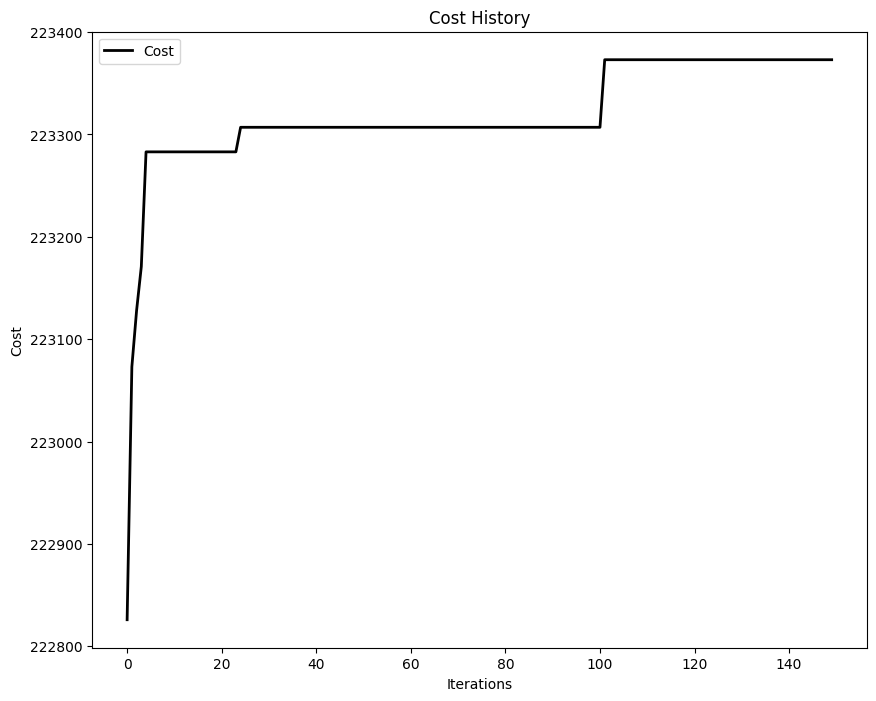

In [10]:
resultPSO.SaveResult(result)